In [1]:
import pandas as pd
import numpy as np
import gc

# 환자 대상군 선별하기

In [2]:
'./sungbin/9_10_DRG_firstICU_DIAG_CV_MV.csv' # 환자 대상군선별함.

'./sungbin/9_10_DRG_firstICU_DIAG_CV_MV.csv'

# 먼저 Chartevent 6개 아이템뽑아내기

In [7]:
''' HDD/MIMIC3/sungbin/chartevent_6itemid.py '''
'''
import pandas as pd
import numpy as np

filename='../CHARTEVENTS.csv'
chunksize=10**6

default = pd.DataFrame()
for cnt, chunk in enumerate(pd.read_csv(filename, chunksize=chunksize)):
    default = default.append(chunk.loc[(chunk['ITEMID'] == 220045 ) | (chunk['ITEMID'] == 220179)  | (chunk['ITEMID'] == 220180 )  | (chunk['ITEMID'] == 220210) | (chunk['ITEMID'] == 220277) | (chunk['ITEMID'] == 223761)])
    # 220045 : HR, 220179 : Non Invasive Blood Pressure systolic, 220180: Non Invasive Blood Pressure diastolic
    # 220210 : Respiratory Rate, 220277 : O2 saturation pulseoxymetry, 223761 : Temperature Fahrenheit



default.to_csv('10_05_CHART_6ITEMS.csv', index=False)
'''

# just테스트
chunksize=10**3
filename='./sungbin/prbc_cv.csv'
default = pd.DataFrame()

for cnt, chunk in enumerate(pd.read_csv(filename, chunksize=chunksize)):
    default = default.append(chunk.loc[(chunk['ITEMID'] == 30179) | (chunk['ITEMID'] == 30104)])
#     del chunk
#     gc.collect()
#     print(chunk.loc[(chunk['ITEMID'] == 30179) | (chunk['ITEMID'] == 30104)])
#     print(chunk)
#     break

In [8]:
default

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,ORDERID,LINKORDERID,STOPPED,NEWBOTTLE,ORIGINALAMOUNT,ORIGINALAMOUNTUOM,ORIGINALROUTE,ORIGINALRATE,ORIGINALRATEUOM,ORIGINALSITE
0,8484363,30417,130724.0,278238.0,2153-01-03 03:00:00,30179,NaN,ml,NaN,NaN,...,4232225,1620312,NaN,1.0,NaN,cc,Intravenous,NaN,NaN,NaN
1,8484364,30417,130724.0,278238.0,2153-01-03 07:00:00,30179,9.0,ml,NaN,NaN,...,2838988,1620312,Stopped,NaN,NaN,cc,Intravenous,NaN,NaN,NaN
2,8484365,30417,130724.0,278238.0,2153-01-15 13:45:00,30179,NaN,ml,NaN,NaN,...,490466,1620312,NaN,1.0,NaN,cc,Intravenous,NaN,NaN,NaN
3,8484366,30417,130724.0,278238.0,2153-01-15 15:15:00,30179,5.0,ml,NaN,NaN,...,3959813,1620312,NaN,NaN,NaN,cc,Intravenous,NaN,NaN,NaN
4,8484367,30417,130724.0,278238.0,2153-01-15 16:00:00,30179,2.0,ml,NaN,NaN,...,8862726,1620312,NaN,NaN,NaN,cc,Intravenous,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,4276717,13765,125858.0,213156.0,2129-11-07 16:00:00,30104,0.0,NaN,NaN,NaN,...,77256,3455166,D/C'd,NaN,NaN,ml,Intravenous Push,NaN,NaN,NaN
9717,4276718,5801,181338.0,298949.0,2104-12-05 06:00:00,30104,3750.0,ml,NaN,NaN,...,1380522,1380522,NaN,NaN,NaN,ml,Intravenous Push,NaN,NaN,NaN
9718,4276719,5801,181338.0,298949.0,2104-12-05 20:00:00,30104,0.0,NaN,NaN,NaN,...,6834318,1380522,D/C'd,NaN,NaN,ml,Intravenous Push,NaN,NaN,NaN
9719,4276720,16911,134350.0,214446.0,2129-09-23 20:00:00,30104,700.0,ml,NaN,NaN,...,152249,152249,NaN,NaN,NaN,ml,Intravenous Push,NaN,NaN,NaN


# 환자 대상군과 CHARTEVENT머지 하기(chartevent 수 줄어들어)

In [ ]:
'''import pandas as pd
chart = pd.read_csv('10_05_CHART_6ITEMS.csv')
print(chart.shape)
diag = pd.read_csv('9_10_DRG_firstICU_DIAG_CV_MV.csv')
print(diag.shape)
diag = diag[['ICUSTAY_ID','label']]
diag = diag.drop_duplicates()
print(diag.shape)
merge = pd.merge(diag, chart, on='ICUSTAY_ID', how='inner')

print(merge.shape)
merge.to_csv('10_05_CHART_DIAG.csv', index=False)
'''
# chart_diag.py

# Chartevent 시간환산하기 (- icu입원시간 기준)

In [ ]:
# chart_diag_INTIME.py
'''import pandas as pd

chart_diag = pd.read_csv('10_05_CHART_DIAG.csv')
print(chart_diag.shape)
intime = pd.read_csv('../ICUSTAYS.csv')
intime = intime[['ICUSTAY_ID','INTIME']]

merge = pd.merge(chart_diag, intime, on='ICUSTAY_ID', how='inner')
print(merge.shape)

import pymysql
from datetime import datetime


def cal(row):
    duration = datetime.strptime(row.CHARTTIME,'%Y-%m-%d %H:%M:%S') - datetime.strptime(row.INTIME,'%Y-%m-%d %H:%M:%S')
    duration_in_s = duration.total_seconds()
    hours = divmod(duration_in_s, 3600)[0]
    if (hours >= 0) and (hours < 24):
        return hours

merge['CAL_CHART_TIME'] = merge.apply(lambda row: cal(row), axis=1)
merge[merge['CAL_CHART_TIME'].notnull()].to_csv('10_05_CHART_DIAG_INTIME.csv', index =False)

'''
# output : 10_05_CHART_DIAG_INTIME.csv

# LABEVENT와 대상 환자군 머지 (Labevent 수 줄이기)

In [ ]:
# lab_diag.py
'''
import pandas as pd
lab = pd.read_csv('../LABEVENTS.csv')
print(lab.shape)
diag = pd.read_csv('9_10_DRG_firstICU_DIAG_CV_MV.csv')
print(diag.shape)
diag = diag[['SUBJECT_ID','ICUSTAY_ID','label']]
diag = diag.drop_duplicates()
print(diag.shape)
merge = pd.merge(diag, lab, on='SUBJECT_ID', how='inner')

print(merge.shape)
merge.to_csv('10_05_LAB_DIAG.csv', index=False)


'''
# output: 10_05_LAB_DIAG.csv

# LABEVENT와 INTIME 시간환산


In [ ]:
# lab_diag_intime.py

'''
import pandas as pd

lab_diag = pd.read_csv('10_05_LAB_DIAG.csv')
print(lab_diag.shape)
intime = pd.read_csv('../ICUSTAYS.csv')
intime = intime[['ICUSTAY_ID','INTIME']]

merge = pd.merge(lab_diag, intime, on='ICUSTAY_ID', how='inner')
print(merge.shape)

import pymysql
from datetime import datetime


def cal(row):
    duration = datetime.strptime(row.CHARTTIME,'%Y-%m-%d %H:%M:%S') - datetime.strptime(row.INTIME,'%Y-%m-%d %H:%M:%S')
    duration_in_s = duration.total_seconds()
    hours = divmod(duration_in_s, 3600)[0]
    if (hours >= 0) and (hours < 24):
        return hours

merge['CAL_LAB_TIME'] = merge.apply(lambda row: cal(row), axis=1)
final = merge[merge['CAL_LAB_TIME'].notnull()]
print(final.shape)
final.to_csv('10_05_LAB_DIAG_INTIME.csv', index =False)

'''
# output: 10_05_LAB_DIAG_INTIME.csv

# PATIENTS와 대상환자군 머지하기

In [ ]:
# patients_diag.py
'''
import pandas as pd
lab = pd.read_csv('../LABEVENTS.csv')
print(lab.shape)
diag = pd.read_csv('9_10_DRG_firstICU_DIAG_CV_MV.csv')
print(diag.shape)
diag = diag[['SUBJECT_ID','ICUSTAY_ID','label']]
diag = diag.drop_duplicates()
print(diag.shape)
merge = pd.merge(diag, lab, on='SUBJECT_ID', how='inner')

print(merge.shape)
merge.to_csv('10_05_LAB_DIAG.csv', index=False)

'''
# output : 10_05_PATIENTS_DIAG.csv

In [ ]:
# patients_diag_intime.py
'''
import pandas as pd

pat_diag = pd.read_csv('10_05_PATIENTS_DIAG.csv')
print(pat_diag.shape)
intime = pd.read_csv('../ICUSTAYS.csv')
intime = intime[['ICUSTAY_ID','INTIME']]

merge = pd.merge(pat_diag, intime, on='ICUSTAY_ID', how='inner')
print(merge.shape)

import pymysql
from datetime import datetime


def cal(row):
    duration = datetime.strptime(row.INTIME,'%Y-%m-%d %H:%M:%S') - datetime.strptime(row.DOB,'%Y-%m-%d %H:%M:%S')
    duration_in_s = duration.total_seconds()
    # hours = divmod(duration_in_s, 3600)[0]
    years = divmod(duration_in_s, 31536000)[0]  
#    if (hours >= 0) and (hours < 24):
    return years

merge['CAL_AGE'] = merge.apply(lambda row: cal(row), axis=1)
final = merge[merge['CAL_AGE'].notnull()]
print(final.shape)
final.to_csv('10_05_PATIENTS_DIAG_INTIME.csv', index =False)

'''
# output : 10_05_PATIENTS_DIAG_INTIME.csv


# INPUTEVETS_CV, MV 통합 수혈 정보 시간환산하기

In [ ]:
# 수혈 통합 정보: 9_12_integrate_cv_mv.csv

In [ ]:
# prbc_intime.py
'''
import pandas as pd

prbc = pd.read_csv('9_12_integrate_cv_mv.csv')
print(prbc.shape)
intime = pd.read_csv('../ICUSTAYS.csv')
intime = intime[['ICUSTAY_ID','INTIME']]

merge = pd.merge(prbc, intime, on='ICUSTAY_ID', how='inner')
print(merge.shape)

import pymysql
from datetime import datetime


def cal(row):
    duration = datetime.strptime(row.PRBC_TIME,'%Y-%m-%d %H:%M:%S') - datetime.strptime(row.INTIME,'%Y-%m-%d %H:%M:%S')
    duration_in_s = duration.total_seconds()
    hours = divmod(duration_in_s, 3600)[0]
    if (hours >= 0) and (hours < 28):
        return hours

merge['CAL_PRBC_TIME'] = merge.apply(lambda row: cal(row), axis=1)
final = merge[merge['CAL_PRBC_TIME'].notnull()]
print(final.shape)
final.to_csv('10_05_PRBC_INTIME.csv', index =False)
'''

# output : prbc_intime.csv

# 데이터 확인하기

In [1]:
import pandas as pd

# lab = pd.read_csv('./sungbin/10_05_LAB_DIAG_INTIME.csv')
# patients = pd.read_csv('./sungbin/10_05_PATIENTS_DIAG_INTIME.csv')

In [28]:
# chart

In [29]:
# lab

# Labevent 스케일링 및 평균값

In [4]:
lab = pd.read_csv('./sungbin/10_05_LAB_DIAG_INTIME.csv'); print(lab.shape)
lab = lab[lab['VALUENUM'].notnull()] # VALUE가 문자인것 다제거.
print(lab.shape)

(1654605, 13)
(1486879, 13)


In [5]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)
min_max = lab[['ITEMID', 'VALUENUM']].groupby(['ITEMID']).agg([min,max,q1,q3])
min_max = min_max.reset_index(drop=False)
min_max = min_max.set_axis(['ITEMID', 'MIN', 'MAX','25th','75th'], axis=1)
min_max['IQR'] = min_max['75th'] - min_max['25th']
min_max['minimum'] = min_max['25th'] - min_max['IQR']
min_max['maximum'] = min_max['75th'] + min_max['IQR']
min_max

,ITEMID,MIN,MAX,25th,75th,IQR,minimum,maximum
0,50801,61.0,729.0,378.000,573.0,195.000,183.00,768.000
1,50802,-45.0,50.0,-3.000,0.0,3.000,-6.00,3.000
2,50803,5.0,36.0,20.000,25.0,5.000,15.00,30.000
3,50804,2.0,84.0,22.000,27.0,5.000,17.00,32.000
4,50805,0.0,7.0,0.775,1.4,0.625,0.15,2.025
...,...,...,...,...,...,...,...,...
348,51507,2.0,30.0,3.500,9.5,6.000,-2.50,15.500
349,51514,0.2,12.0,0.200,2.0,1.800,-1.60,3.800
350,51516,0.0,874.0,0.000,11.0,11.000,-11.00,22.000
351,51517,17.0,17.0,17.000,17.0,0.000,17.00,17.000


In [6]:
new = pd.merge(lab, min_max, on='ITEMID', how='left') # 머지하기
new = new.loc[(new.VALUENUM >= new['minimum']) & (new.VALUENUM <= new['maximum'])] # 이상치 제거
new['VALUENUM_NORM'] = (new.VALUENUM - new.MIN)/ (new.MAX - new.MIN) # 정규화하기
new = new[['SUBJECT_ID','HADM_ID','ICUSTAY_ID','CAL_LAB_TIME','ITEMID','VALUENUM_NORM']] 
new 

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CAL_LAB_TIME,ITEMID,VALUENUM_NORM
0,15787,122380.0,260844.0,8.0,50818,0.154930
1,15787,122380.0,260844.0,8.0,50820,0.755396
2,15787,122380.0,260844.0,8.0,50821,0.236129
3,15787,122380.0,260844.0,12.0,50912,0.054795
4,15787,122380.0,260844.0,12.0,51006,0.075000
...,...,...,...,...,...,...
1486874,79069,115164.0,226424.0,19.0,51274,0.021939
1486875,79069,115164.0,226424.0,19.0,51275,0.112000
1486876,79069,115164.0,226424.0,19.0,51277,0.521341
1486877,79069,115164.0,226424.0,19.0,51279,0.244030


In [7]:
MEAN = new.groupby(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID','ITEMID', 'CAL_LAB_TIME'])['VALUENUM_NORM'].mean()
MEAN = MEAN.reset_index(name='MEAN_VALUENUM')
MEAN

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CAL_LAB_TIME,MEAN_VALUENUM
0,3,145834.0,211552.0,50801,2.0,0.511976
1,3,145834.0,211552.0,50802,0.0,0.431579
2,3,145834.0,211552.0,50802,13.0,0.421053
3,3,145834.0,211552.0,50802,15.0,0.410526
4,3,145834.0,211552.0,50802,20.0,0.421053
...,...,...,...,...,...,...
1318553,99995,137810.0,229633.0,51275,17.0,0.161455
1318554,99995,137810.0,229633.0,51279,1.0,0.213433
1318555,99995,137810.0,229633.0,51279,12.0,0.233582
1318556,99995,137810.0,229633.0,51301,1.0,0.043432


# Labevents 피처수 줄이기(280->20)

In [16]:
MEAN['ITEMID'].value_counts()[:12]

50820    67063
50818    62790
50821    62430
50804    62294
50802    56167
51221    42238
50809    39955
50822    36386
50808    36002
51265    32119
50817    30102
51222    29364
Name: ITEMID, dtype: int64

In [9]:
table = pd.pivot_table(MEAN, values='MEAN_VALUENUM', index=['ICUSTAY_ID', 'CAL_LAB_TIME'],
                    columns=['ITEMID'])
table

ITEMID                   50801     50802  50803     50804  50805     50806  \
ICUSTAY_ID CAL_LAB_TIME                                                      
200003.0   2.0             NaN       NaN    NaN       NaN    NaN       NaN   
           5.0             NaN       NaN    NaN       NaN    NaN       NaN   
           6.0             NaN  0.421053    NaN  0.219512    NaN       NaN   
           7.0             NaN  0.452632    NaN  0.256098    NaN       NaN   
           14.0            NaN  0.473684    NaN  0.268293    NaN       NaN   
...                        ...       ...    ...       ...    ...       ...   
299999.0   11.0            NaN  0.473684    NaN  0.292683    NaN  0.235294   
           13.0            NaN  0.484211    NaN  0.317073    NaN       NaN   
           16.0            NaN  0.473684    NaN  0.280488    NaN       NaN   
           21.0            NaN       NaN    NaN       NaN    NaN       NaN   
           22.0            NaN       NaN    NaN       NaN    NaN       NaN   

ITEMID                      50808     50809     50810     50811  ...  51491  \
ICUSTAY_ID CAL_LAB_TIME                                          ...          
200003.0   2.0                NaN       NaN       NaN       NaN  ...    0.0   
           5.0                NaN       NaN       NaN       NaN  ...    NaN   
           6.0           0.008148       NaN       NaN       NaN  ...    NaN   
           7.0                NaN       NaN       NaN       NaN  ...    NaN   
           14.0               NaN       NaN       NaN       NaN  ...    NaN   
...                           ...       ...       ...       ...  ...    ...   
299999.0   11.0          0.010551  0.129762       NaN       NaN  ...    NaN   
           13.0          0.008043  0.163095  0.082803  0.083015  ...    NaN   
           16.0          0.009297  0.189286       NaN       NaN  ...    NaN   
           21.0               NaN       NaN       NaN       NaN  ...    NaN   
           22.0               NaN  0.122619       NaN       NaN  ...    NaN   

ITEMID                      51492  51493  51494  51497     51498  51501  \
ICUSTAY_ID CAL_LAB_TIME                                                   
200003.0   2.0           0.008696    NaN    NaN    NaN  0.305556    NaN   
           5.0                NaN    NaN    NaN    NaN       NaN    NaN   
           6.0                NaN    NaN    NaN    NaN       NaN    NaN   
           7.0                NaN    NaN    NaN    NaN       NaN    NaN   
           14.0               NaN    NaN    NaN    NaN       NaN    NaN   
...                           ...    ...    ...    ...       ...    ...   
299999.0   11.0               NaN    NaN    NaN    NaN       NaN    NaN   
           13.0               NaN    NaN    NaN    NaN       NaN    NaN   
           16.0               NaN    NaN    NaN    NaN       NaN    NaN   
           21.0               NaN    NaN    NaN    NaN       NaN    NaN   
           22.0               NaN    NaN    NaN    NaN       NaN    NaN   

ITEMID                   51507  51514  51516  
ICUSTAY_ID CAL_LAB_TIME                       
200003.0   2.0             NaN    NaN    NaN  
           5.0             NaN    NaN    NaN  
           6.0             NaN    NaN    NaN  
           7.0             NaN    NaN    NaN  
           14.0            NaN    NaN    NaN  
...                        ...    ...    ...  
299999.0   11.0            NaN    NaN    NaN  
           13.0            NaN    NaN    NaN  
           16.0            NaN    NaN    NaN  
           21.0            NaN    NaN    NaN  
           22.0            NaN    NaN    NaN  

[110331 rows x 309 columns]

In [17]:
ls = table.notnull().sum().sort_values(ascending=False).index[:20]
for_mer = pd.DataFrame(ls, columns=['ITEMID'])
lab_new = pd.merge(MEAN, for_mer, on='ITEMID', how='inner')
print(len(lab_new.ITEMID.unique()))
lab_new

12


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CAL_LAB_TIME,MEAN_VALUENUM
0,3,145834.0,211552.0,50802,0.0,0.431579
1,3,145834.0,211552.0,50802,13.0,0.421053
2,3,145834.0,211552.0,50802,15.0,0.410526
3,3,145834.0,211552.0,50802,20.0,0.421053
4,3,145834.0,211552.0,50802,22.0,0.410526
...,...,...,...,...,...,...
556905,99985,176670.0,279638.0,51265,21.0,0.175513
556906,99991,151118.0,226241.0,51265,4.0,0.129512
556907,99991,151118.0,226241.0,51265,10.0,0.189667
556908,99995,137810.0,229633.0,51265,1.0,0.130219


In [27]:
lab_new.to_csv('./sungbin/10_05_LAB_20ITEMS.csv',index=False)


In [6]:
lab = pd.read_csv('./sungbin/10_05_LAB_20ITEMS.csv')
lab.head()


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CAL_LAB_TIME,MEAN_VALUENUM
0,3,145834.0,211552.0,50802,0.0,0.431579
1,3,145834.0,211552.0,50802,13.0,0.421053
2,3,145834.0,211552.0,50802,15.0,0.410526
3,3,145834.0,211552.0,50802,20.0,0.421053
4,3,145834.0,211552.0,50802,22.0,0.410526


# Chartevent도 스케일링 및 시간구간으로 평균값

In [2]:
chart = pd.read_csv('./sungbin/10_06_CHART_DIAG_INTIME.csv')
chart.head()

,ICUSTAY_ID,label,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED,INTIME,CAL_CHART_TIME
0,209103.0,1,4669969,31123,154148,220179,2114-02-10 20:03:00,2114-02-10 22:22:00,21198.0,104.0,104.0,mmHg,0.0,0.0,NaN,NaN,2114-02-10 09:21:32,10.0
1,209103.0,1,4669970,31123,154148,220180,2114-02-10 20:03:00,2114-02-10 22:22:00,21198.0,64.0,64.0,mmHg,0.0,0.0,NaN,NaN,2114-02-10 09:21:32,10.0
2,209103.0,1,4669972,31123,154148,220045,2114-02-10 21:00:00,2114-02-10 22:22:00,21198.0,73.0,73.0,bpm,0.0,0.0,NaN,NaN,2114-02-10 09:21:32,11.0
3,209103.0,1,4669973,31123,154148,220210,2114-02-10 21:00:00,2114-02-10 22:22:00,21198.0,24.0,24.0,insp/min,0.0,0.0,NaN,NaN,2114-02-10 09:21:32,11.0
4,209103.0,1,4669974,31123,154148,220277,2114-02-10 21:00:00,2114-02-10 22:22:00,21198.0,98.0,98.0,%,0.0,0.0,NaN,NaN,2114-02-10 09:21:32,11.0


In [3]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)
min_max = chart[['ITEMID', 'VALUENUM']].groupby(['ITEMID']).agg([min,max,q1,q3])
min_max = min_max.reset_index(drop=False)
min_max = min_max.set_axis(['ITEMID', 'MIN', 'MAX','25th','75th'], axis=1)
min_max['IQR'] = min_max['75th'] - min_max['25th']
min_max['minimum'] = min_max['25th'] - min_max['IQR']
min_max['maximum'] = min_max['75th'] + min_max['IQR']
min_max

,ITEMID,MIN,MAX,25th,75th,IQR,minimum,maximum
0,220045,0.0,941.00,74.0,97.0,23.0,51.0,120.0
1,220179,0.0,127105.99,100.0,128.0,28.0,72.0,156.0
2,220180,0.0,7546.00,51.0,70.0,19.0,32.0,89.0
3,220210,0.0,1211.00,15.0,22.0,7.0,8.0,29.0
4,220277,0.0,9795.00,96.0,100.0,4.0,92.0,104.0
5,223761,0.0,997.50,97.3,99.0,1.7,95.6,100.7


In [4]:
new = pd.merge(chart, min_max, on='ITEMID', how='left') # 머지하기
new = new.loc[(new.VALUENUM >= new['minimum']) & (new.VALUENUM <= new['maximum'])] # 이상치 제거
new['VALUENUM_NORM'] = (new.VALUENUM - new.MIN)/ (new.MAX - new.MIN) # 정규화하기
new = new[['SUBJECT_ID','HADM_ID','ICUSTAY_ID','CAL_CHART_TIME','ITEMID','VALUENUM_NORM']]
new

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CAL_CHART_TIME,ITEMID,VALUENUM_NORM
0,31123,154148,209103.0,10.0,220179,0.000818
1,31123,154148,209103.0,10.0,220180,0.008481
2,31123,154148,209103.0,11.0,220045,0.077577
3,31123,154148,209103.0,11.0,220210,0.019818
4,31123,154148,209103.0,11.0,220277,0.010005
...,...,...,...,...,...,...
743465,79069,115164,226424.0,9.0,220045,0.078640
743466,79069,115164,226424.0,9.0,220179,0.000802
743467,79069,115164,226424.0,9.0,220180,0.008879
743468,79069,115164,226424.0,9.0,220210,0.010735


In [ ]:
new.to_csv('./sungbin/10_06_CHART_MEAN_VALUENUM.csv', index=False)

# CHART and LAB merge!

In [8]:
lab = pd.read_csv('./sungbin/10_05_LAB_20ITEMS.csv')
chart = pd.read_csv('./sungbin/10_06_CHART_MEAN_VALUENUM.csv')

In [11]:
lab.rename(columns={'CAL_LAB_TIME' : 'CAL_TIME', 'MEAN_VALUENUM':'VALUENUM_NORM'}, inplace = True)
chart.rename(columns={'CAL_CHART_TIME' : 'CAL_TIME'}, inplace = True)

In [16]:
print(chart.shape)
print(lab.shape)

(706058, 6)
(785888, 6)


In [17]:
new_merge = pd.merge(lab, chart, on=['SUBJECT_ID','HADM_ID','ICUSTAY_ID','CAL_TIME','ITEMID','VALUENUM_NORM'], how='outer')
print(new_merge.shape)

(1491946, 6)


In [18]:
table = pd.pivot_table(new_merge, values='VALUENUM_NORM', index=['SUBJECT_ID','HADM_ID','ICUSTAY_ID', 'CAL_TIME'],
                    columns=['ITEMID'])
table

ITEMID                                     50802     50804     50808   \
SUBJECT_ID HADM_ID  ICUSTAY_ID CAL_TIME                                 
3          145834.0 211552.0   0.0       0.431579  0.286585  0.007991   
                               2.0            NaN       NaN  0.008252   
                               5.0            NaN       NaN       NaN   
                               6.0            NaN       NaN  0.007939   
                               7.0            NaN       NaN       NaN   
...                                           ...       ...       ...   
99995      137810.0 229633.0   19.0           NaN       NaN       NaN   
                               20.0           NaN       NaN       NaN   
                               21.0           NaN       NaN       NaN   
                               22.0           NaN       NaN       NaN   
                               23.0           NaN       NaN       NaN   

ITEMID                                     50809     50817     50818   \
SUBJECT_ID HADM_ID  ICUSTAY_ID CAL_TIME                                 
3          145834.0 211552.0   0.0       0.166667       NaN  0.150235   
                               2.0            NaN  0.098241  0.154930   
                               5.0            NaN       NaN  0.140845   
                               6.0            NaN  0.077176       NaN   
                               7.0            NaN       NaN  0.136150   
...                                           ...       ...       ...   
99995      137810.0 229633.0   19.0           NaN       NaN       NaN   
                               20.0           NaN       NaN       NaN   
                               21.0           NaN       NaN       NaN   
                               22.0           NaN       NaN       NaN   
                               23.0           NaN       NaN       NaN   

ITEMID                                     50820     50821     50822   50882   \
SUBJECT_ID HADM_ID  ICUSTAY_ID CAL_TIME                                         
3          145834.0 211552.0   0.0       0.672662  0.284731  0.005834     NaN   
                               2.0       0.640288  0.370323  0.005586     NaN   
                               5.0       0.661871  0.225806       NaN     NaN   
                               6.0       0.669065       NaN       NaN     NaN   
                               7.0       0.690647  0.233548       NaN     NaN   
...                                           ...       ...       ...     ...   
99995      137810.0 229633.0   19.0           NaN       NaN       NaN     NaN   
                               20.0           NaN       NaN       NaN     NaN   
                               21.0           NaN       NaN       NaN     NaN   
                               22.0           NaN       NaN       NaN     NaN   
                               23.0           NaN       NaN       NaN     NaN   

ITEMID                                   ...   51265     51277     51279   \
SUBJECT_ID HADM_ID  ICUSTAY_ID CAL_TIME  ...                                
3          145834.0 211552.0   0.0       ...  0.15322  0.461890  0.204851   
                               2.0       ...      NaN       NaN       NaN   
                               5.0       ...      NaN       NaN       NaN   
                               6.0       ...      NaN       NaN       NaN   
                               7.0       ...      NaN  0.469512  0.246269   
...                                      ...      ...       ...       ...   
99995      137810.0 229633.0   19.0      ...      NaN       NaN       NaN   
                               20.0      ...      NaN       NaN       NaN   
                               21.0      ...      NaN       NaN       NaN   
                               22.0      ...      NaN       NaN       NaN   
                               23.0      ...      NaN       NaN       NaN   

ITEMID                                     5

In [19]:
table.to_csv('./sungbin/10_06_CHART_LAB_MERGE.csv', index=True)

# CHART_LAB + PATIENTS merge!

In [20]:
chart_lab = pd.read_csv('./sungbin/10_06_CHART_LAB_MERGE.csv')

In [21]:
chart_lab

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CAL_TIME,50802,50804,50808,50809,50817,50818,...,51265,51277,51279,51301,220045,220179,220180,220210,220277,223761
0,3,145834.0,211552.0,0.0,0.431579,0.286585,0.007991,0.166667,NaN,0.150235,...,0.15322,0.461890,0.204851,0.080965,NaN,NaN,NaN,NaN,NaN,NaN
1,3,145834.0,211552.0,2.0,NaN,NaN,0.008252,NaN,0.098241,0.154930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,145834.0,211552.0,5.0,NaN,NaN,NaN,NaN,NaN,0.140845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,145834.0,211552.0,6.0,NaN,NaN,0.007939,NaN,0.077176,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,145834.0,211552.0,7.0,NaN,NaN,NaN,NaN,NaN,0.136150,...,NaN,0.469512,0.246269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199971,99995,137810.0,229633.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.089267,NaN,NaN,0.019818,0.009903,NaN
199972,99995,137810.0,229633.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.085016,NaN,NaN,0.017341,0.010005,NaN
199973,99995,137810.0,229633.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.088204,NaN,NaN,0.020644,0.010107,NaN
199974,99995,137810.0,229633.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.086079,NaN,NaN,0.015690,0.010107,0.099048


In [25]:
pat = pd.read_csv('./sungbin/10_05_PATIENTS_DIAG_INTIME.csv')
pat = pat[['ICUSTAY_ID','GENDER','CAL_AGE']]
pat
print(chart_lab.shape)
print(pat.shape)

merge = pd.merge(chart_lab, pat, on='ICUSTAY_ID', how='inner')
print(merge.shape)

(199976, 30)
(16222, 3)
(199976, 32)


In [28]:
merge
merge.to_csv('./sungbin/10_06_CHART_LAB_PATIENTS.csv',index=False)

# 1hour time window - pRBC merge


In [2]:
import pandas as pd
chart_lab_pat = pd.read_csv('./sungbin/10_06_CHART_LAB_PATIENTS.csv')
from tqdm import tqdm
chart_lab_pat["ICUSTAY_ID"] = chart_lab_pat.ICUSTAY_ID.astype('int')
chart_lab_pat["CAL_TIME"] = chart_lab_pat.CAL_TIME.astype('int')
def func_one_hour(row):
    time = row.CAL_TIME
    return f'{row.ICUSTAY_ID}_{time}'
    
chart_lab_pat['new_time'] = chart_lab_pat.apply(lambda row: func_one_hour(row), axis=1)
chart_lab_pat


prbc = pd.read_csv('sungbin/10_05_PRBC_INTIME.csv')
# 다음 1시간묶기
from tqdm import tqdm
prbc["ICUSTAY_ID"] = prbc.ICUSTAY_ID.astype('int')
prbc["CAL_PRBC_TIME"] = prbc.CAL_PRBC_TIME.astype('int')
def func_one_hour(row):
    time = row.CAL_PRBC_TIME
    return f'{row.ICUSTAY_ID}_{time}'
    
prbc['new_time'] = prbc.apply(lambda row: func_one_hour(row), axis=1)
prbc

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,PRBC_TIME,ITEMID,AMOUNT,AMOUNTUOM,label,INTIME,CAL_PRBC_TIME,new_time
0,3,145834,211552,2101-10-21 02:00:00,30001,375.000000,ml,1,2101-10-20 19:10:11,6,211552_6
1,21,109451,217847,2134-09-12 03:00:00,30001,375.000000,ml,1,2134-09-11 20:50:04,6,217847_6
2,23,152223,227807,2153-09-03 16:00:00,30001,375.000000,ml,1,2153-09-03 09:38:55,6,227807_6
3,35,166707,282039,2122-02-10 22:00:00,30001,375.000000,ml,1,2122-02-10 09:39:59,12,282039_12
4,35,166707,282039,2122-02-11 06:30:00,30001,375.000000,ml,1,2122-02-10 09:39:59,20,282039_20
...,...,...,...,...,...,...,...,...,...,...,...
11741,99938,103815,296707,2200-10-27 18:43:00,225168,375.000000,ml,1,2200-10-27 10:48:30,7,296707_7
11742,99938,103815,296707,2200-10-28 07:00:00,225168,374.999981,ml,1,2200-10-27 10:48:30,20,296707_20
11743,99982,151454,221194,2156-11-29 15:57:00,225168,277.999997,ml,1,2156-11-28 11:57:12,27,221194_27
11744,99982,151454,221194,2156-11-29 14:06:00,225168,277.999997,ml,1,2156-11-28 11:57:12,26,221194_26


In [4]:
prbc['ITEMID'].value_counts()


30001     7024
225168    4697
30004       25
Name: ITEMID, dtype: int64

# 4hours time window - prbc merge

In [98]:
chart_lab_pat = pd.read_csv('./sungbin/10_06_CHART_LAB_PATIENTS.csv')
from tqdm import tqdm
chart_lab_pat["ICUSTAY_ID"] = chart_lab_pat.ICUSTAY_ID.astype('int')
chart_lab_pat["CAL_TIME"] = chart_lab_pat.CAL_TIME.astype('int')


def func(row):
    time = row.CAL_TIME
    if time >= 0 and time < 4:
        return f'{row.ICUSTAY_ID}_0'
    elif time >= 4 and time < 8:
        return f'{row.ICUSTAY_ID}_4'
    elif time >= 8 and time < 12:
        return f'{row.ICUSTAY_ID}_8'
    elif time >= 12 and time < 16:
        return f'{row.ICUSTAY_ID}_12'
    elif time >= 16 and time < 20:
        return f'{row.ICUSTAY_ID}_16'
    else:
        return f'{row.ICUSTAY_ID}_20'
    
chart_lab_pat['new_time'] = chart_lab_pat.apply(lambda row: func(row), axis=1)
new = chart_lab_pat.iloc[:,4:].groupby(['new_time']).mean()
new

non_num = chart_lab_pat[['GENDER','new_time']]
dup_non_num = non_num.drop_duplicates()
dup_non_num

chart_lab_pat_merge = pd.merge(new, dup_non_num, on='new_time', how='inner')
chart_lab_pat_merge

''' AGE >89 = 90 & normalization'''
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
chart_lab_pat_merge[chart_lab_pat_merge['CAL_AGE'] > 89]['CAL_AGE'] = 90
chart_lab_pat_merge['CAL_AGE'] = minmax.fit_transform(chart_lab_pat_merge['CAL_AGE'].values.reshape(-1,1))
chart_lab_pat_merge


<ipython-input-98-b5976747f30a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_lab_pat_merge[chart_lab_pat_merge['CAL_AGE'] > 89]['CAL_AGE'] = 90


,new_time,50802,50804,50808,50809,50817,50818,50820,50821,50822,...,51279,51301,220045,220179,220180,220210,220277,223761,CAL_AGE,GENDER
0,200003_12,0.473684,0.268293,NaN,NaN,NaN,0.154930,0.784173,0.139355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M
1,200003_20,0.484211,0.317073,NaN,NaN,0.097238,0.206573,0.737410,0.152903,NaN,...,0.261940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M
2,200003_4,0.436842,0.237805,0.008148,NaN,0.095231,0.166667,0.719424,0.117419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M
3,200007_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.059517,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,M
4,200007_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75617,299999_12,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M
75618,299999_16,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,...,0.300746,0.110456,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M
75619,299999_20,NaN,NaN,NaN,0.122619,0.094228,NaN,NaN,NaN,0.006703,...,0.288806,0.084718,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M
75620,299999_4,0.478947,0.292683,0.010028,0.127976,NaN,0.194836,0.733813,0.476129,0.007540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M


In [106]:
''' pRBC 4 hours time binding'''

prbc = pd.read_csv('sungbin/10_05_PRBC_INTIME.csv')
prbc["ICUSTAY_ID"] = prbc.ICUSTAY_ID.astype('int')
prbc["CAL_PRBC_TIME"] = prbc.CAL_PRBC_TIME.astype('int')
def func_prbc_next_time(row):
    time = row.CAL_PRBC_TIME
    if time >= 0 and time < 4:
        return f'{row.ICUSTAY_ID}_non'
    elif time >= 4 and time < 8:
        return f'{row.ICUSTAY_ID}_0'
    elif time >= 8 and time < 12:
        return f'{row.ICUSTAY_ID}_4'
    elif time >= 12 and time < 16:
        return f'{row.ICUSTAY_ID}_8'
    elif time >= 16 and time < 20:
        return f'{row.ICUSTAY_ID}_12'
    elif time >= 20 and time < 24:
        return f'{row.ICUSTAY_ID}_16'
    else:
        return f'{row.ICUSTAY_ID}_20'
    
def func_prbc_same_time(row):
    time = row.CAL_PRBC_TIME
    if time >= 0 and time < 4:
        return f'{row.ICUSTAY_ID}_0'
    elif time >= 4 and time < 8:
        return f'{row.ICUSTAY_ID}_4'
    elif time >= 8 and time < 12:
        return f'{row.ICUSTAY_ID}_8'
    elif time >= 12 and time < 16:
        return f'{row.ICUSTAY_ID}_12'
    elif time >= 16 and time < 20:
        return f'{row.ICUSTAY_ID}_16'
    elif time >= 20 and time < 24:
        return f'{row.ICUSTAY_ID}_20'
    else:
        return f'{row.ICUSTAY_ID}_non'
    
prbc['new_time'] = prbc.apply(lambda row: func_prbc_next_time(row), axis=1)
prbc

for_merge_prbc = prbc[['new_time','label']]
for_merge_prbc = for_merge_prbc.drop_duplicates()
for_merge_prbc

chart_lab_pat_prbc = pd.merge(chart_lab_pat_merge,for_merge_prbc,on='new_time',how='left')
chart_lab_pat_prbc['label'] = chart_lab_pat_prbc['label'].fillna(0)
print(chart_lab_pat_merge.shape)
print(for_merge_prbc.shape)
print(chart_lab_pat_prbc.shape)

chart_lab_pat_prbc


(75622, 29)
(7887, 2)
(75622, 30)


,new_time,50802,50804,50808,50809,50817,50818,50820,50821,50822,...,51301,220045,220179,220180,220210,220277,223761,CAL_AGE,GENDER,label
0,200003_12,0.473684,0.268293,NaN,NaN,NaN,0.154930,0.784173,0.139355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M,0.0
1,200003_20,0.484211,0.317073,NaN,NaN,0.097238,0.206573,0.737410,0.152903,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M,0.0
2,200003_4,0.436842,0.237805,0.008148,NaN,0.095231,0.166667,0.719424,0.117419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M,0.0
3,200007_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.059517,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,M,0.0
4,200007_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,M,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75617,299999_12,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M,0.0
75618,299999_16,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,...,0.110456,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M,0.0
75619,299999_20,NaN,NaN,NaN,0.122619,0.094228,NaN,NaN,NaN,0.006703,...,0.084718,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M,0.0
75620,299999_4,0.478947,0.292683,0.010028,0.127976,NaN,0.194836,0.733813,0.476129,0.007540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,M,0.0


In [107]:
chart_lab_pat_prbc['label'].value_counts()

0.0    69754
1.0     5868
Name: label, dtype: int64

In [108]:
''' gender label encoding '''
chart_lab_pat_prbc['GENDER'] = chart_lab_pat_prbc.apply(lambda row : 0 if row.GENDER == 'M' else 1, axis=1)

In [109]:
chart_lab_pat_prbc

,new_time,50802,50804,50808,50809,50817,50818,50820,50821,50822,...,51301,220045,220179,220180,220210,220277,223761,CAL_AGE,GENDER,label
0,200003_12,0.473684,0.268293,NaN,NaN,NaN,0.154930,0.784173,0.139355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
1,200003_20,0.484211,0.317073,NaN,NaN,0.097238,0.206573,0.737410,0.152903,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
2,200003_4,0.436842,0.237805,0.008148,NaN,0.095231,0.166667,0.719424,0.117419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
3,200007_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.059517,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,0,0.0
4,200007_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75617,299999_12,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
75618,299999_16,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,...,0.110456,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
75619,299999_20,NaN,NaN,NaN,0.122619,0.094228,NaN,NaN,NaN,0.006703,...,0.084718,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
75620,299999_4,0.478947,0.292683,0.010028,0.127976,NaN,0.194836,0.733813,0.476129,0.007540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0


In [110]:
chart_lab_pat_prbc['GENDER'].value_counts() # null check

0    46568
1    29054
Name: GENDER, dtype: int64

In [111]:
chart_lab_pat_prbc.to_csv('./sungbin/10_06_PRBC_CHART_LAB_PAT_NEXTTIME.csv', index=False)

# SAME TIME

In [112]:
chart_lab_pat = pd.read_csv('./sungbin/10_06_CHART_LAB_PATIENTS.csv')
from tqdm import tqdm
chart_lab_pat["ICUSTAY_ID"] = chart_lab_pat.ICUSTAY_ID.astype('int')
chart_lab_pat["CAL_TIME"] = chart_lab_pat.CAL_TIME.astype('int')


def func(row):
    time = row.CAL_TIME
    if time >= 0 and time < 4:
        return f'{row.ICUSTAY_ID}_0'
    elif time >= 4 and time < 8:
        return f'{row.ICUSTAY_ID}_4'
    elif time >= 8 and time < 12:
        return f'{row.ICUSTAY_ID}_8'
    elif time >= 12 and time < 16:
        return f'{row.ICUSTAY_ID}_12'
    elif time >= 16 and time < 20:
        return f'{row.ICUSTAY_ID}_16'
    else:
        return f'{row.ICUSTAY_ID}_20'
    
chart_lab_pat['new_time'] = chart_lab_pat.apply(lambda row: func(row), axis=1)
new = chart_lab_pat.iloc[:,4:].groupby(['new_time']).mean()
new

non_num = chart_lab_pat[['GENDER','new_time']]
dup_non_num = non_num.drop_duplicates()
dup_non_num

chart_lab_pat_merge = pd.merge(new, dup_non_num, on='new_time', how='inner')
chart_lab_pat_merge

''' AGE >89 = 90 & normalization'''
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
chart_lab_pat_merge[chart_lab_pat_merge['CAL_AGE'] > 89]['CAL_AGE'] = 90
chart_lab_pat_merge['CAL_AGE'] = minmax.fit_transform(chart_lab_pat_merge['CAL_AGE'].values.reshape(-1,1))
chart_lab_pat_merge

''' pRBC 4 hours time binding'''

prbc = pd.read_csv('sungbin/10_05_PRBC_INTIME.csv')
prbc["ICUSTAY_ID"] = prbc.ICUSTAY_ID.astype('int')
prbc["CAL_PRBC_TIME"] = prbc.CAL_PRBC_TIME.astype('int')
def func_prbc_next_time(row):
    time = row.CAL_PRBC_TIME
    if time >= 0 and time < 4:
        return f'{row.ICUSTAY_ID}_non'
    elif time >= 4 and time < 8:
        return f'{row.ICUSTAY_ID}_0'
    elif time >= 8 and time < 12:
        return f'{row.ICUSTAY_ID}_4'
    elif time >= 12 and time < 16:
        return f'{row.ICUSTAY_ID}_8'
    elif time >= 16 and time < 20:
        return f'{row.ICUSTAY_ID}_12'
    elif time >= 20 and time < 24:
        return f'{row.ICUSTAY_ID}_16'
    else:
        return f'{row.ICUSTAY_ID}_20'
    
def func_prbc_same_time(row):
    time = row.CAL_PRBC_TIME
    if time >= 0 and time < 4:
        return f'{row.ICUSTAY_ID}_0'
    elif time >= 4 and time < 8:
        return f'{row.ICUSTAY_ID}_4'
    elif time >= 8 and time < 12:
        return f'{row.ICUSTAY_ID}_8'
    elif time >= 12 and time < 16:
        return f'{row.ICUSTAY_ID}_12'
    elif time >= 16 and time < 20:
        return f'{row.ICUSTAY_ID}_16'
    elif time >= 20 and time < 24:
        return f'{row.ICUSTAY_ID}_20'
    else:
        return f'{row.ICUSTAY_ID}_non'
    
prbc['new_time'] = prbc.apply(lambda row: func_prbc_same_time(row), axis=1)
prbc

for_merge_prbc = prbc[['new_time','label']]
for_merge_prbc = for_merge_prbc.drop_duplicates()
for_merge_prbc

chart_lab_pat_prbc = pd.merge(chart_lab_pat_merge,for_merge_prbc,on='new_time',how='left')
chart_lab_pat_prbc['label'] = chart_lab_pat_prbc['label'].fillna(0)
print(chart_lab_pat_merge.shape)
print(for_merge_prbc.shape)
print(chart_lab_pat_prbc.shape)

chart_lab_pat_prbc
''' gender label encoding '''
chart_lab_pat_prbc['GENDER'] = chart_lab_pat_prbc.apply(lambda row : 0 if row.GENDER == 'M' else 1, axis=1)

chart_lab_pat_prbc.to_csv('./sungbin/10_06_PRBC_CHART_LAB_PAT_SAMETIME.csv', index=False)

<ipython-input-112-cd10ba57bc2a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_lab_pat_merge[chart_lab_pat_merge['CAL_AGE'] > 89]['CAL_AGE'] = 90


(75622, 29)
(7887, 2)
(75622, 30)


# check FINAL INPUT  TABLE

In [5]:
input_table = pd.read_csv('./sungbin/10_06_PRBC_CHART_LAB_PAT_NEXTTIME.csv')
input_table

,new_time,50802,50804,50808,50809,50817,50818,50820,50821,50822,...,51301,220045,220179,220180,220210,220277,223761,CAL_AGE,GENDER,label
0,200003_12,0.473684,0.268293,NaN,NaN,NaN,0.154930,0.784173,0.139355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
1,200003_20,0.484211,0.317073,NaN,NaN,0.097238,0.206573,0.737410,0.152903,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
2,200003_4,0.436842,0.237805,0.008148,NaN,0.095231,0.166667,0.719424,0.117419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
3,200007_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.059517,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,0,0.0
4,200007_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75617,299999_12,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
75618,299999_16,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,...,0.110456,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
75619,299999_20,NaN,NaN,NaN,0.122619,0.094228,NaN,NaN,NaN,0.006703,...,0.084718,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0
75620,299999_4,0.478947,0.292683,0.010028,0.127976,NaN,0.194836,0.733813,0.476129,0.007540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0


In [6]:
input_table['label'].value_counts()

0.0    69754
1.0     5868
Name: label, dtype: int64

In [9]:
#결손값 체크하기
length = len(input_table.iloc[:,1:-3].columns)
print(input_table.iloc[:,1:-3].isnull().sum(axis=1) / length , '\n')
drop_much_null = input_table[input_table.iloc[:,1:-3].isnull().sum(axis=1) / length < 0.7]
# null값의 비율

print(drop_much_null['label'].value_counts())
drop_much_null
len(drop_much_null)

0        0.807692
1        0.384615
2        0.538462
3        0.653846
4        0.884615
           ...   
75617    0.653846
75618    0.269231
75619    0.576923
75620    0.692308
75621    0.615385
Length: 75622, dtype: float64 

0.0    41015
1.0     4207
Name: label, dtype: int64


45222

# 결손치 는 먼저 환자별 평균값 대체

In [224]:
input_table = pd.read_csv('./sungbin/10_06_PRBC_CHART_LAB_PAT_NEXTTIME.csv')
input_table

def seperate(row):
    under_idx = row.new_time.find('_')
    return int(row.new_time[:under_idx])
input_table['ICUSTAY_ID'] = input_table.apply(lambda row: seperate(row),axis=1)

input_table

,new_time,50802,50804,50808,50809,50817,50818,50820,50821,50822,...,220045,220179,220180,220210,220277,223761,CAL_AGE,GENDER,label,ICUSTAY_ID
0,200003_12,0.473684,0.268293,NaN,NaN,NaN,0.154930,0.784173,0.139355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,200003
1,200003_20,0.484211,0.317073,NaN,NaN,0.097238,0.206573,0.737410,0.152903,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,200003
2,200003_4,0.436842,0.237805,0.008148,NaN,0.095231,0.166667,0.719424,0.117419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,200003
3,200007_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,0,0.0,200007
4,200007_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,0,0.0,200007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75617,299999_12,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,299999
75618,299999_16,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,299999
75619,299999_20,NaN,NaN,NaN,0.122619,0.094228,NaN,NaN,NaN,0.006703,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,299999
75620,299999_4,0.478947,0.292683,0.010028,0.127976,NaN,0.194836,0.733813,0.476129,0.007540,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,299999


In [210]:
gr_mean = input_table.groupby(['ICUSTAY_ID']).mean().iloc[:,:-3]
# print(gr_mean)
cols = ['MEAN_50802', 'MEAN_50804', 'MEAN_50808', 'MEAN_50809', 'MEAN_50817', 'MEAN_50818', 'MEAN_50820', 'MEAN_50821',
       'MEAN_50822', 'MEAN_50882', 'MEAN_50902', 'MEAN_50971', 'MEAN_51221', 'MEAN_51222', 'MEAN_51249', 'MEAN_51250',
       'MEAN_51265', 'MEAN_51277', 'MEAN_51279', 'MEAN_51301', 'MEAN_220045', 'MEAN_220179', 'MEAN_220180',
       'MEAN_220210', 'MEAN_220277', 'MEAN_223761']
gr_mean.columns = cols
gr_mean
# gr_mean.to_csv('./sungbin/10_06_gr_mean.csv', index=True)

,MEAN_50802,MEAN_50804,MEAN_50808,MEAN_50809,MEAN_50817,MEAN_50818,MEAN_50820,MEAN_50821,MEAN_50822,MEAN_50882,...,MEAN_51265,MEAN_51277,MEAN_51279,MEAN_51301,MEAN_220045,MEAN_220179,MEAN_220180,MEAN_220210,MEAN_220277,MEAN_223761
ICUSTAY_ID,,,,,,,,,,,,,,,,,,,,,
200003,0.464912,0.274390,0.008148,NaN,0.096234,0.176056,0.747002,0.136559,NaN,0.351064,...,0.077141,0.429878,0.261940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382979,...,0.171267,0.405488,NaN,0.059517,NaN,NaN,NaN,NaN,NaN,NaN
200009,0.462281,0.288872,0.008892,0.144107,0.097238,0.191608,0.738129,0.290323,0.006656,0.372340,...,0.106334,0.460366,0.235354,0.066354,NaN,NaN,NaN,NaN,NaN,NaN
200012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.087757,0.387195,0.264925,0.025737,NaN,NaN,NaN,NaN,NaN,NaN
200014,0.473684,0.269512,0.009401,0.125000,0.092222,0.169249,0.757194,0.179484,NaN,0.393617,...,0.084926,0.405488,0.273507,0.077212,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299969,0.445614,0.235772,0.008892,0.154762,0.088753,0.160407,0.723921,0.221720,0.005911,0.372340,...,0.098372,0.414634,0.266045,0.093298,NaN,NaN,NaN,NaN,NaN,NaN
299976,0.467836,0.304878,0.009297,0.145610,0.068149,0.224570,0.695683,0.237204,0.006195,0.436170,...,0.083746,0.494665,0.293470,0.045576,NaN,NaN,NaN,NaN,NaN,NaN
299981,0.453509,0.243394,0.008966,0.134821,0.088009,0.160798,0.739508,0.141774,0.005896,0.361702,...,0.141189,0.435976,0.250000,0.062466,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
mean_for_null = pd.read_csv('./sungbin/10_06_gr_mean.csv')
# mean_for_null

In [226]:
''' 환자별 평균값 넣기 '''
merge = pd.merge(input_table, mean_for_null, on='ICUSTAY_ID', how='left')
merge

cols_org = ['50802', '50804', '50808', '50809', '50817', '50818',
       '50820', '50821', '50822', '50882', '50902', '50971', '51221', '51222',
       '51249', '51250', '51265', '51277', '51279', '51301', '220045',
       '220179', '220180', '220210', '220277', '223761']
cols_ls = ['50802', '50804', '50808', '50809', '50817', '50818',
       '50820', '50821', '50822', '50882', '50902', '50971', '51221', '51222',
       '51249', '51250', '51265', '51277', '51279', '51301', '220045',
       '220179', '220180', '220210', '220277', '223761',
           'MEAN_50802', 'MEAN_50804', 'MEAN_50808',
       'MEAN_50809', 'MEAN_50817', 'MEAN_50818', 'MEAN_50820', 'MEAN_50821',
       'MEAN_50822', 'MEAN_50882', 'MEAN_50902', 'MEAN_50971', 'MEAN_51221',
       'MEAN_51222', 'MEAN_51249', 'MEAN_51250', 'MEAN_51265', 'MEAN_51277',
       'MEAN_51279', 'MEAN_51301', 'MEAN_220045', 'MEAN_220179', 'MEAN_220180',
       'MEAN_220210', 'MEAN_220277', 'MEAN_223761']
cols_ls_mean = ['MEAN_50802', 'MEAN_50804', 'MEAN_50808',
       'MEAN_50809', 'MEAN_50817', 'MEAN_50818', 'MEAN_50820', 'MEAN_50821',
       'MEAN_50822', 'MEAN_50882', 'MEAN_50902', 'MEAN_50971', 'MEAN_51221',
       'MEAN_51222', 'MEAN_51249', 'MEAN_51250', 'MEAN_51265', 'MEAN_51277',
       'MEAN_51279', 'MEAN_51301', 'MEAN_220045', 'MEAN_220179', 'MEAN_220180',
       'MEAN_220210', 'MEAN_220277', 'MEAN_223761']

print(merge.isnull().sum())
for i in cols_org:
    merge[i] = merge[i].fillna(merge[f'MEAN_{i}'])
print(merge.isnull().sum())

drop_mean_merge = merge.drop(columns=cols_ls_mean)
drop_mean_merge

new_time           0
50802          40596
50804          37614
50808          47461
50809          51759
50817          53725
50818          36890
50820          33157
50821          35771
50822          52069
50882          48198
50902          46892
50971          47728
51221          37381
51222          48711
51249          48944
51250          49803
51265          46706
51277          49679
51279          48923
51301          49275
220045         42537
220179         56921
220180         56885
220210         42563
220277         42360
223761         54611
CAL_AGE            0
GENDER             0
label              0
ICUSTAY_ID         0
MEAN_50802     20712
MEAN_50804     18475
MEAN_50808     27425
MEAN_50809     34429
MEAN_50817     32277
MEAN_50818     17445
MEAN_50820     16041
MEAN_50821     16647
MEAN_50822     33874
MEAN_50882      4371
MEAN_50902      3742
MEAN_50971      6150
MEAN_51221      5653
MEAN_51222      5789
MEAN_51249      5258
MEAN_51250      8191
MEAN_51265   

,new_time,50802,50804,50808,50809,50817,50818,50820,50821,50822,...,220045,220179,220180,220210,220277,223761,CAL_AGE,GENDER,label,ICUSTAY_ID
0,200003_12,0.473684,0.268293,0.008148,NaN,0.096234,0.154930,0.784173,0.139355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,200003
1,200003_20,0.484211,0.317073,0.008148,NaN,0.097238,0.206573,0.737410,0.152903,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,200003
2,200003_4,0.436842,0.237805,0.008148,NaN,0.095231,0.166667,0.719424,0.117419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,200003
3,200007_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,0,0.0,200007
4,200007_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.140523,0,0.0,200007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75617,299999_12,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,299999
75618,299999_16,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,299999
75619,299999_20,0.475877,0.292175,0.009480,0.122619,0.094228,0.198748,0.728417,0.287312,0.006703,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,299999
75620,299999_4,0.478947,0.292683,0.010028,0.127976,0.096234,0.194836,0.733813,0.476129,0.007540,...,NaN,NaN,NaN,NaN,NaN,NaN,0.156863,0,0.0,299999


In [228]:
# drop_mean_merge.to_csv('./sungbin/10_06_FINAL_INPUT_fill_MEAN.csv', index=False)

# 결손치를 환자별 평균으로 대체해도 남아있다.
- 0.7이상으로 결손치가 차지하는 비율이 높다면 제거한다.
- 그래도 남은 결손치는 전체 평균값으로 대체한다.

In [14]:
mean_fill = pd.read_csv('./sungbin/10_06_FINAL_INPUT_fill_MEAN.csv')

In [15]:
# mean_fill

In [16]:
#결손값 체크하기
length = len(mean_fill.iloc[:,1:-3].columns)
print(mean_fill.iloc[:,1:-3].isnull().sum(axis=1) / length , '\n')
drop_much_null = mean_fill[mean_fill.iloc[:,1:-3].isnull().sum(axis=1) / length < 0.7]
# null값의 비율

print(drop_much_null['label'].value_counts())
drop_much_null
len(drop_much_null)

''' 전체 평균으로 대체함. '''
fill_total_mean = drop_much_null.fillna(drop_much_null.mean())
fill_total_mean
print(fill_total_mean['label'].value_counts())
# fill_total_mean.to_csv('./sungbin/10_06_FINAL_INPUT_fill_TOTAL_MEAN.csv', index=False)

0        0.333333
1        0.333333
2        0.333333
3        0.629630
4        0.629630
           ...   
75617    0.259259
75618    0.259259
75619    0.259259
75620    0.259259
75621    0.259259
Length: 75622, dtype: float64 

0.0    68881
1.0     5828
Name: label, dtype: int64
0.0    68881
1.0     5828
Name: label, dtype: int64


# 모델링

## 

In [1]:
import pandas as pd
final_input = pd.read_csv('./sungbin/10_06_FINAL_INPUT_fill_TOTAL_MEAN.csv')

In [2]:
final_input['label'].value_counts()

0.0    68881
1.0     5828
Name: label, dtype: int64

In [3]:
final_input.columns

Index(['new_time', '50802', '50804', '50808', '50809', '50817', '50818',
       '50820', '50821', '50822', '50882', '50902', '50971', '51221', '51222',
       '51249', '51250', '51265', '51277', '51279', '51301', '220045',
       '220179', '220180', '220210', '220277', '223761', 'CAL_AGE', 'GENDER',
       'label', 'ICUSTAY_ID'],
      dtype='object')

In [7]:
final_input

,new_time,50802,50804,50808,50809,50817,50818,50820,50821,50822,...,220045,220179,220180,220210,220277,223761,CAL_AGE,GENDER,label,ICUSTAY_ID
0,200003_12,0.473684,0.268293,0.009096,0.154952,0.087936,0.154930,0.784173,0.139355,0.006167,...,0.089576,0.000898,0.008008,0.015212,0.009946,0.098404,0.156863,0,0.0,200003
1,200003_20,0.484211,0.317073,0.009096,0.154952,0.097238,0.206573,0.737410,0.152903,0.006167,...,0.089576,0.000898,0.008008,0.015212,0.009946,0.098404,0.156863,0,0.0,200003
2,200003_4,0.436842,0.237805,0.008148,0.154952,0.095231,0.166667,0.719424,0.117419,0.006167,...,0.089576,0.000898,0.008008,0.015212,0.009946,0.098404,0.156863,0,0.0,200003
3,200007_16,0.460861,0.272500,0.009096,0.154952,0.087936,0.189010,0.721021,0.181925,0.006167,...,0.089576,0.000898,0.008008,0.015212,0.009946,0.098404,0.140523,0,0.0,200007
4,200007_8,0.460861,0.272500,0.009096,0.154952,0.087936,0.189010,0.721021,0.181925,0.006167,...,0.089576,0.000898,0.008008,0.015212,0.009946,0.098404,0.140523,0,0.0,200007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74704,299999_12,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,...,0.089576,0.000898,0.008008,0.015212,0.009946,0.098404,0.156863,0,0.0,299999
74705,299999_16,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,...,0.089576,0.000898,0.008008,0.015212,0.009946,0.098404,0.156863,0,0.0,299999
74706,299999_20,0.460861,0.272500,0.009096,0.122619,0.094228,0.189010,0.721021,0.181925,0.006703,...,0.089576,0.000898,0.008008,0.015212,0.009946,0.098404,0.156863,0,0.0,299999
74707,299999_4,0.478947,0.292683,0.010028,0.127976,0.087936,0.194836,0.733813,0.476129,0.007540,...,0.089576,0.000898,0.008008,0.015212,0.009946,0.098404,0.156863,0,0.0,299999


In [ ]:

# XGBoost
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score , recall_score , confusion_matrix, f1_score
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# from tqdm import tqdm

from imblearn.over_sampling import SMOTE

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


    
def roc_curve_plot_all(y_test, pred_proba_c1, model_name):
    # 임계값에 따른 FPR, TPR값을 반환받음.
    fprs , tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # Roc 곡선 그림
    plt.plot(fprs, tprs, label=f'{model_name}')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--')
    
    # FPR X 축의 Scale 을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()

def feature_importance(estimator):

    # feature importance
    ftr_importances_values = estimator.feature_importances_
    # print(ftr_importance_values)
    # Series로 변환
    ftr_importances = pd.Series(ftr_importances_values, index=encoding_input_table.drop(columns=['label','new_time','ICUSTAY_ID']).columns)

    # 중요도 순으로 정렬
    ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]
    # print(ftr_top20)

    plt.figure(figsize=(8,6))
    plt.title('Feature importances TOP 15')
    sns.barplot(x=ftr_top15, y=ftr_top15.index)
    plt.show()


def fit_predict_models(models, X_train, X_test, y_train, y_test, models_name):
    for idx, model in enumerate(models):
        model.fit(X_train, y_train)
        pred_proba = model.predict_proba(X_test)[:, 1]
        pred = model.predict(X_test)
        
        roc_curve_plot_all(y_test, pred_proba, models_name[idx])
        print('기본적인 다른 평가:')
        get_clf_eval(y_test, pred, pred_proba)
        

[03:53:24] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
기본적인 다른 평가:
오차 행렬
[[12102  1674]
 [  578   588]]
정확도: 0.8493, 정밀도: 0.2599, 재현율: 0.5043,          F1: 0.3431, AUC:0.7781
기본적인 다른 평가:
오차 행렬
[[13295   481]
 [  845   321]]
정확도: 0.9113, 정밀도: 0.4002, 재현율: 0.2753,          F1: 0.3262, AUC:0.8007
기본적인 다른 평가:
오차 행렬
[[12972   804]
 [  747   419]]
정확도: 0.8962, 정밀도: 0.3426, 재현율: 0.3593,          F1: 0.3508, AUC:0.7919


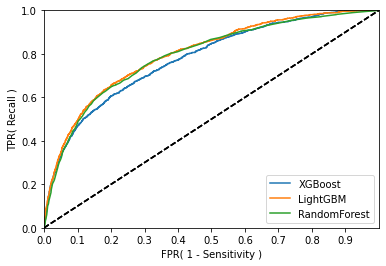

In [8]:

# dt_clf = DecisionTreeClassifier()
XGBoost = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)
LightGBM = LGBMClassifier(n_estimators=200, num_leaves=64, boost_from_average=False)
rf_clf = RandomForestClassifier()
smote = SMOTE(random_state=2021)

encoding_input_table = final_input.copy()
# label0_df = encoding_input_table[encoding_input_table['label'] == 0.].sample(n=).reset_index(drop=True)
# encoding_input_table = pd.concat([label0_df, encoding_input_table[encoding_input_table['label'] == 1.]]).reset_index(drop=True)
features = encoding_input_table.drop(columns=['label','new_time','ICUSTAY_ID']).values
label = encoding_input_table['label']
# features, label = smote.fit_resample(features, label)

X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.2, stratify=label)
X_train, y_train = smote.fit_resample(X_train, y_train)


models = [XGBoost,LightGBM,rf_clf]
models_name = ['XGBoost','LightGBM','RandomForest']

fit_predict_models(models, X_train, X_test, y_train, y_test, models_name)




    
    



# feature importance

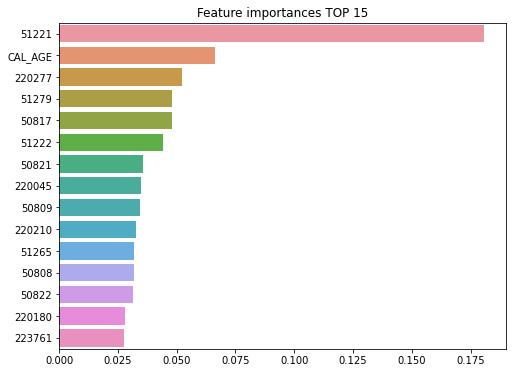

In [9]:
feature_importance(rf_clf)

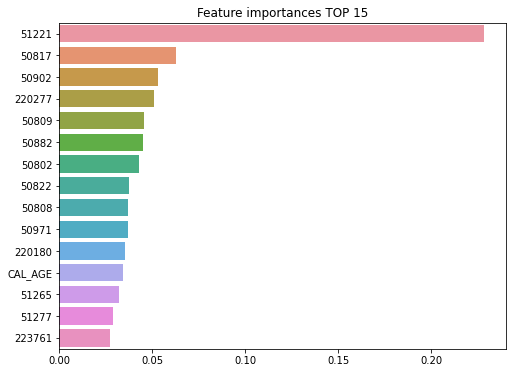

In [10]:
feature_importance(XGBoost)

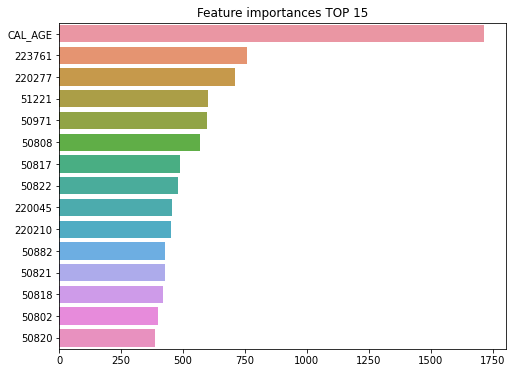

In [11]:
feature_importance(LightGBM)

In [238]:
drop_much_null.columns

Index(['new_time', '50802', '50804', '50808', '50809', '50817', '50818',
       '50820', '50821', '50822', '50882', '50902', '50971', '51221', '51222',
       '51249', '51250', '51265', '51277', '51279', '51301', '220045',
       '220179', '220180', '220210', '220277', '223761', 'CAL_AGE', 'GENDER',
       'label', 'ICUSTAY_ID'],
      dtype='object')

In [171]:
merge[cols_ls]

,50802,50804,50808,50809,50817,50818,50820,50821,50822,50882,...,MEAN_51265,MEAN_51277,MEAN_51279,MEAN_51301,MEAN_220045,MEAN_220179,MEAN_220180,MEAN_220210,MEAN_220277,MEAN_223761
0,0.473684,0.268293,NaN,NaN,NaN,0.154930,0.784173,0.139355,NaN,NaN,...,0.077141,0.429878,0.261940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.484211,0.317073,NaN,NaN,0.097238,0.206573,0.737410,0.152903,NaN,0.425532,...,0.077141,0.429878,0.261940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.436842,0.237805,0.008148,NaN,0.095231,0.166667,0.719424,0.117419,NaN,0.276596,...,0.077141,0.429878,0.261940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404255,...,0.171267,0.405488,NaN,0.059517,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361702,...,0.171267,0.405488,NaN,0.059517,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75617,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,NaN,...,0.169144,0.394817,0.294776,0.097587,NaN,NaN,NaN,NaN,NaN,NaN
75618,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,0.404255,...,0.169144,0.394817,0.294776,0.097587,NaN,NaN,NaN,NaN,NaN,NaN
75619,NaN,NaN,NaN,0.122619,0.094228,NaN,NaN,NaN,0.006703,NaN,...,0.169144,0.394817,0.294776,0.097587,NaN,NaN,NaN,NaN,NaN,NaN
75620,0.478947,0.292683,0.010028,0.127976,NaN,0.194836,0.733813,0.476129,0.007540,NaN,...,0.169144,0.394817,0.294776,0.097587,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
merge.iloc[4,1] == None

False

In [195]:
merge.iloc[4,1]

nan

In [186]:
import numpy as np
merge

,new_time,50802,50804,50808,50809,50817,50818,50820,50821,50822,...,MEAN_51265,MEAN_51277,MEAN_51279,MEAN_51301,MEAN_220045,MEAN_220179,MEAN_220180,MEAN_220210,MEAN_220277,MEAN_223761
0,200003_12,0.473684,0.268293,NaN,NaN,NaN,0.154930,0.784173,0.139355,NaN,...,0.077141,0.429878,0.261940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200003_20,0.484211,0.317073,NaN,NaN,0.097238,0.206573,0.737410,0.152903,NaN,...,0.077141,0.429878,0.261940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200003_4,0.436842,0.237805,0.008148,NaN,0.095231,0.166667,0.719424,0.117419,NaN,...,0.077141,0.429878,0.261940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200007_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.171267,0.405488,NaN,0.059517,NaN,NaN,NaN,NaN,NaN,NaN
4,200007_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.171267,0.405488,NaN,0.059517,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75617,299999_12,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,...,0.169144,0.394817,0.294776,0.097587,NaN,NaN,NaN,NaN,NaN,NaN
75618,299999_16,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,...,0.169144,0.394817,0.294776,0.097587,NaN,NaN,NaN,NaN,NaN,NaN
75619,299999_20,NaN,NaN,NaN,0.122619,0.094228,NaN,NaN,NaN,0.006703,...,0.169144,0.394817,0.294776,0.097587,NaN,NaN,NaN,NaN,NaN,NaN
75620,299999_4,0.478947,0.292683,0.010028,0.127976,NaN,0.194836,0.733813,0.476129,0.007540,...,0.169144,0.394817,0.294776,0.097587,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
print(merge.columns)

Index(['new_time', '50802', '50804', '50808', '50809', '50817', '50818',
       '50820', '50821', '50822', '50882', '50902', '50971', '51221', '51222',
       '51249', '51250', '51265', '51277', '51279', '51301', '220045',
       '220179', '220180', '220210', '220277', '223761', 'CAL_AGE', 'GENDER',
       'label', 'ICUSTAY_ID', 'MEAN_50802', 'MEAN_50804', 'MEAN_50808',
       'MEAN_50809', 'MEAN_50817', 'MEAN_50818', 'MEAN_50820', 'MEAN_50821',
       'MEAN_50822', 'MEAN_50882', 'MEAN_50902', 'MEAN_50971', 'MEAN_51221',
       'MEAN_51222', 'MEAN_51249', 'MEAN_51250', 'MEAN_51265', 'MEAN_51277',
       'MEAN_51279', 'MEAN_51301', 'MEAN_220045', 'MEAN_220179', 'MEAN_220180',
       'MEAN_220210', 'MEAN_220277', 'MEAN_223761'],
      dtype='object')


In [130]:
input_table.iloc[:,1:-3].notnull().sum(axis=1) / length

0        0.192308
1        0.615385
2        0.461538
3        0.346154
4        0.115385
           ...   
75617    0.346154
75618    0.730769
75619    0.423077
75620    0.307692
75621    0.384615
Length: 75622, dtype: float64

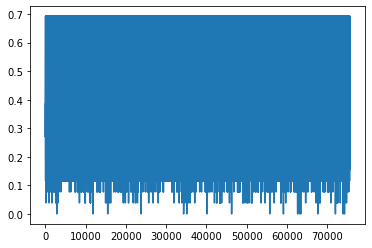

In [135]:
import matplotlib.pyplot as plt
plt.plot(drop_much_null.iloc[:,1:-3].isnull().sum(axis=1) / length)

In [119]:
input_table.iloc[:,1:-3].notnull().sum(axis=1)

0         5
1        16
2        12
3         9
4         3
         ..
75617     9
75618    19
75619    11
75620     8
75621    10
Length: 75622, dtype: int64

In [118]:
length = len(input_table.iloc[:,1:-3].columns)
length

26

In [44]:
chart_lab_pat_merge.CAL_AGE.value_counts()

300.0    2959
0.0      2572
68.0     2006
77.0     1992
72.0     1982
         ... 
302.0      10
301.0       8
306.0       6
16.0        4
303.0       1
Name: CAL_AGE, Length: 80, dtype: int64

In [47]:
''' AGE >89 = 90 & normalization'''
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
chart_lab_pat_merge[chart_lab_pat_merge['CAL_AGE'] > 89] = 90
chart_lab_pat_merge['CAL_AGE'] = minmax.fit_transform(chart_lab_pat_merge['CAL_AGE'].values.reshape(-1,1))
chart_lab_pat_merge

,new_time,50802,50804,50808,50809,50817,50818,50820,50821,50822,...,51279,51301,220045,220179,220180,220210,220277,223761,CAL_AGE,GENDER
0,200003_12,0.473684,0.268293,NaN,NaN,NaN,0.154930,0.784173,0.139355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,M
1,200003_20,0.484211,0.317073,NaN,NaN,0.097238,0.206573,0.737410,0.152903,NaN,...,0.261940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,M
2,200003_4,0.436842,0.237805,0.008148,NaN,0.095231,0.166667,0.719424,0.117419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,M
3,200007_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.059517,NaN,NaN,NaN,NaN,NaN,NaN,0.477778,M
4,200007_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.477778,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75617,299999_12,0.484211,0.317073,0.008043,0.163095,0.097238,0.215962,0.726619,0.166452,0.006889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,M
75618,299999_16,0.473684,0.280488,0.009297,0.189286,0.097238,0.192488,0.726619,0.158710,0.006330,...,0.300746,0.110456,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,M
75619,299999_20,NaN,NaN,NaN,0.122619,0.094228,NaN,NaN,NaN,0.006703,...,0.288806,0.084718,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,M
75620,299999_4,0.478947,0.292683,0.010028,0.127976,NaN,0.194836,0.733813,0.476129,0.007540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,M


In [46]:
chart_lab_pat_merge.CAL_AGE.value_counts()

90.0    2984
0.0     2572
68.0    2006
77.0    1992
72.0    1982
        ... 
20.0      70
18.0      59
89.0      42
17.0      32
16.0       4
Name: CAL_AGE, Length: 76, dtype: int64